In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/naya-project-cars-cleaned/cars_cleaned.csv


# Init

In [2]:
# For validation
from sklearn.model_selection import train_test_split as split

In [3]:
# For scoring
from sklearn.metrics import mean_squared_log_error as msle
# from sklearn.metrics import root_mean_squared_error as rmse

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import seaborn as sns

# Importing dataset

In [7]:
cars_raw = pd.read_csv('/kaggle/input/naya-project-cars-cleaned/cars_cleaned.csv')

## Data review

In [8]:
# numeric_data = cars_raw.select_dtypes(include=['number'])
# sns.pairplot(numeric_data, hue="price", vars=numeric_data.columns)


In [9]:
cars_raw.odometer

0          57923.0
1          71229.0
2          19160.0
3          41124.0
4         128000.0
            ...   
347092     32226.0
347093     12029.0
347094      4174.0
347095     30112.0
347096     22716.0
Name: odometer, Length: 347097, dtype: float64

### some mistic logic filtering

In [10]:
cars_raw[(cars_raw['price'] < 1000) & (cars_raw['odometer'].astype('int') < 1000.0) & (cars_raw['condition']  =='new')]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
116822,7316247174,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
116899,7315040726,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
117003,7313786197,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
117107,7311364569,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
117364,7307696792,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
117467,7304739745,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
117498,7304334698,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
117602,7302250625,349,2020-01-01,dodge,journey crossroads,new,999,gas,29.0,automatic,other,other,other,other,il
180436,7303583431,500,2019-01-01,chevrolet,silverado,new,999,gas,100.0,automatic,other,other,other,other,mo
188903,7310189991,450,2020-01-01,jaguar,other,new,10,gas,400.0,automatic,other,other,other,other,nc


In [11]:
cars_raw = cars_raw[~(
    (cars_raw['price'] < 1000) & 
    (cars_raw['odometer'].astype('int') < 1000.0) & 
    (cars_raw['condition'] == 'new')
)]

In [12]:
cars_raw[cars_raw['fuel']  =='electric']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
774,7309692127,29890,2013-01-01,tesla,model s,other,999,electric,61591.0,automatic,rwd,other,sedan,grey,al
1012,7306565136,32990,2013-01-01,tesla,model s,other,999,electric,69961.0,automatic,rwd,other,sedan,white,al
1028,7306134436,38750,2018-01-01,tesla,model 3,other,999,electric,14452.0,automatic,other,other,other,other,al
1280,7302622559,25990,2018-01-01,mitsubishi,outlander phev gt,good,999,electric,13938.0,other,4wd,other,SUV,other,al
1351,7301654156,29890,2013-01-01,tesla,model s,other,999,electric,61591.0,automatic,rwd,other,sedan,grey,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345766,7314872982,36590,2019-01-01,tesla,model 3 standard range,good,999,electric,23057.0,other,rwd,other,sedan,white,wi
346045,7316398604,37990,2019-01-01,tesla,model 3 standard range,good,999,electric,22544.0,other,rwd,other,sedan,white,wi
346153,7313463689,32990,2013-01-01,tesla,model s signature,good,999,electric,62588.0,other,rwd,other,sedan,white,wi
346456,7306602793,14590,2016-01-01,ford,focus electric hatchback 4d,good,999,electric,17358.0,other,fwd,other,hatchback,white,wi


In [13]:
cars_raw.loc[cars_raw['fuel'] == 'electric', 'cylinders'] = 0

In [14]:
cars_raw.loc[cars_raw['fuel'] == 'electric', 'transmission'] = "automatic"

In [15]:
cars_raw[cars_raw['fuel']  == 'electric']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
774,7309692127,29890,2013-01-01,tesla,model s,other,0,electric,61591.0,automatic,rwd,other,sedan,grey,al
1012,7306565136,32990,2013-01-01,tesla,model s,other,0,electric,69961.0,automatic,rwd,other,sedan,white,al
1028,7306134436,38750,2018-01-01,tesla,model 3,other,0,electric,14452.0,automatic,other,other,other,other,al
1280,7302622559,25990,2018-01-01,mitsubishi,outlander phev gt,good,0,electric,13938.0,automatic,4wd,other,SUV,other,al
1351,7301654156,29890,2013-01-01,tesla,model s,other,0,electric,61591.0,automatic,rwd,other,sedan,grey,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345766,7314872982,36590,2019-01-01,tesla,model 3 standard range,good,0,electric,23057.0,automatic,rwd,other,sedan,white,wi
346045,7316398604,37990,2019-01-01,tesla,model 3 standard range,good,0,electric,22544.0,automatic,rwd,other,sedan,white,wi
346153,7313463689,32990,2013-01-01,tesla,model s signature,good,0,electric,62588.0,automatic,rwd,other,sedan,white,wi
346456,7306602793,14590,2016-01-01,ford,focus electric hatchback 4d,good,0,electric,17358.0,automatic,fwd,other,hatchback,white,wi


In [16]:
cars_raw[cars_raw['fuel']  == 'gas']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,7316814884,33590,2014-01-01,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,other,other,other,pickup,white,al
1,7316814758,22590,2010-01-01,chevrolet,silverado 1500,good,8,gas,71229.0,other,other,other,pickup,blue,al
2,7316814989,39590,2020-01-01,chevrolet,silverado 1500 crew,good,8,gas,19160.0,other,other,other,pickup,red,al
3,7316743432,30990,2017-01-01,toyota,tundra double cab sr,good,8,gas,41124.0,other,other,other,pickup,red,al
4,7316356412,15000,2013-01-01,ford,f-150 xlt,excellent,6,gas,128000.0,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347091,7301591199,33590,2018-01-01,lexus,gs 350 sedan 4d,good,6,gas,30814.0,automatic,rwd,other,sedan,white,wy
347092,7301591192,23590,2019-01-01,nissan,maxima s sedan 4d,good,6,gas,32226.0,other,fwd,other,sedan,other,wy
347093,7301591187,30590,2020-01-01,volvo,s60 t5 momentum sedan 4d,good,999,gas,12029.0,other,fwd,other,sedan,red,wy
347095,7301591140,28990,2018-01-01,lexus,es 350 sedan 4d,good,6,gas,30112.0,other,fwd,other,sedan,silver,wy


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

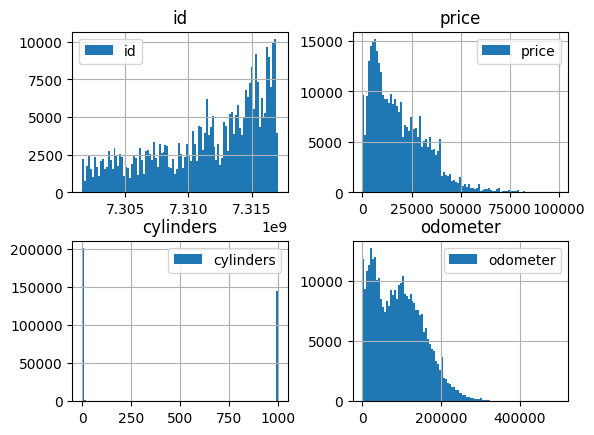

In [17]:
cars_raw.hist(bins=100, legend=True)

In [18]:
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347045 entries, 0 to 347096
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347045 non-null  int64  
 1   price         347045 non-null  int64  
 2   year          347045 non-null  object 
 3   manufacturer  347045 non-null  object 
 4   model         347045 non-null  object 
 5   condition     347045 non-null  object 
 6   cylinders     347045 non-null  int64  
 7   fuel          347045 non-null  object 
 8   odometer      347045 non-null  float64
 9   transmission  347045 non-null  object 
 10  drive         347045 non-null  object 
 11  size          347045 non-null  object 
 12  type          347045 non-null  object 
 13  paint_color   347045 non-null  object 
 14  state         347045 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 42.4+ MB


In [19]:
cars_raw.isnull().sum()

id              0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [20]:
cars_raw.describe()

,id,price,cylinders,odometer
count,3.470450e+05,347045.000000,347045.000000,347045.000000
mean,7.311491e+09,19116.345995,419.629691,93191.930378
std,4.380349e+06,14353.493776,489.589722,63430.207087
min,7.301583e+09,2.000000,0.000000,0.000000
25%,7.308134e+09,7500.000000,6.000000,38373.000000
50%,7.312632e+09,15990.000000,8.000000,88201.000000
75%,7.315245e+09,27990.000000,999.000000,136235.000000
max,7.317101e+09,99999.000000,999.000000,499232.000000


In [21]:
cars_raw.value_counts()

id          price  year        manufacturer  model                  condition  cylinders  fuel   odometer  transmission  drive  size       type   paint_color  state
7301583321  18997  2013-01-01  dodge         durango                excellent  999        gas    96475.0   automatic     4wd    other      SUV    black        ny       1
7314592269  13999  2016-01-01  audi          q3 2.0t premium plus   other      4          gas    118769.0  automatic     fwd    other      SUV    white        ca       1
7314592363  8999   2014-01-01  ford          focus s                other      4          other  43976.0   automatic     fwd    other      sedan  white        ca       1
7314592354  9800   2009-01-01  infiniti      ex 35                  excellent  6          gas    111300.0  automatic     4wd    mid-size   SUV    grey         fl       1
7314592337  6999   2015-01-01  ford          fiesta s               other      4          gas    59599.0   manual        fwd    other      sedan  silver   

In [22]:
cars_raw.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,7316814884,33590,2014-01-01,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,other,other,other,pickup,white,al
1,7316814758,22590,2010-01-01,chevrolet,silverado 1500,good,8,gas,71229.0,other,other,other,pickup,blue,al
2,7316814989,39590,2020-01-01,chevrolet,silverado 1500 crew,good,8,gas,19160.0,other,other,other,pickup,red,al
3,7316743432,30990,2017-01-01,toyota,tundra double cab sr,good,8,gas,41124.0,other,other,other,pickup,red,al
4,7316356412,15000,2013-01-01,ford,f-150 xlt,excellent,6,gas,128000.0,automatic,rwd,full-size,truck,black,al


# Data manipulations

## temporary moving out cylinders column

In [23]:
# cars = cars_raw.drop('cylinders', axis=1)

## Converting Year column to int

In [24]:
cars_raw['year'] = cars_raw['year'].str.replace('-01-01','')

In [25]:
cars_raw['year'] = cars_raw['year'].astype('int')

In [26]:
cars_raw['year']

0         2014
1         2010
2         2020
3         2017
4         2013
          ... 
347092    2019
347093    2020
347094    2020
347095    2018
347096    2019
Name: year, Length: 347045, dtype: int64

In [27]:
# cars_raw.groupby(['manufacturer', 'condition', 'fuel'])['price'].median()

import pandas as pd

# Group by the categorical fields and aggregate the price
agg_result = cars_raw.groupby(['manufacturer', 'condition', 'fuel'])['price'].median().reset_index()

# Rename the aggregated column for clarity
agg_result.rename(columns={'price': 'avg_price'}, inplace=True)

print(agg_result)


    manufacturer  condition    fuel  avg_price
0          acura  excellent     gas     9995.0
1          acura  excellent  hybrid     7988.0
2          acura       fair     gas     2400.0
3          acura       good  diesel    19590.0
4          acura       good     gas    26990.0
..           ...        ...     ...        ...
667        volvo      other  diesel    25000.0
668        volvo      other     gas     9278.5
669        volvo      other  hybrid    43995.0
670        volvo      other   other     9900.0
671        volvo    salvage     gas      949.5

[672 rows x 4 columns]


## dropping columns exclude: year, manufacturer, condition, fuel, odometer, state -> price

In [28]:
cars_m1 = cars_raw.drop([ 'cylinders', 'model','transmission', 'drive', 'size', 'type', 'paint_color'], axis=1, errors=False)

In [29]:
cars_m1

,id,price,year,manufacturer,condition,fuel,odometer,state
0,7316814884,33590,2014,gmc,good,gas,57923.0,al
1,7316814758,22590,2010,chevrolet,good,gas,71229.0,al
2,7316814989,39590,2020,chevrolet,good,gas,19160.0,al
3,7316743432,30990,2017,toyota,good,gas,41124.0,al
4,7316356412,15000,2013,ford,excellent,gas,128000.0,al
...,...,...,...,...,...,...,...,...
347092,7301591192,23590,2019,nissan,good,gas,32226.0,wy
347093,7301591187,30590,2020,volvo,good,gas,12029.0,wy
347094,7301591147,34990,2020,cadillac,good,diesel,4174.0,wy
347095,7301591140,28990,2018,lexus,good,gas,30112.0,wy


## Set id as index

In [30]:
cars_m1.set_index('id')

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316814884,33590,2014,gmc,good,gas,57923.0,al
7316814758,22590,2010,chevrolet,good,gas,71229.0,al
7316814989,39590,2020,chevrolet,good,gas,19160.0,al
7316743432,30990,2017,toyota,good,gas,41124.0,al
7316356412,15000,2013,ford,excellent,gas,128000.0,al
...,...,...,...,...,...,...,...
7301591192,23590,2019,nissan,good,gas,32226.0,wy
7301591187,30590,2020,volvo,good,gas,12029.0,wy
7301591147,34990,2020,cadillac,good,diesel,4174.0,wy


In [31]:
cars_m1.describe()

,id,price,year,odometer
count,3.470450e+05,347045.000000,347045.000000,347045.000000
mean,7.311491e+09,19116.345995,2012.154196,93191.930378
std,4.380349e+06,14353.493776,6.266242,63430.207087
min,7.301583e+09,2.000000,1981.000000,0.000000
25%,7.308134e+09,7500.000000,2009.000000,38373.000000
50%,7.312632e+09,15990.000000,2013.000000,88201.000000
75%,7.315245e+09,27990.000000,2017.000000,136235.000000
max,7.317101e+09,99999.000000,2022.000000,499232.000000


In [32]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347045 entries, 0 to 347096
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347045 non-null  int64  
 1   price         347045 non-null  int64  
 2   year          347045 non-null  int64  
 3   manufacturer  347045 non-null  object 
 4   condition     347045 non-null  object 
 5   fuel          347045 non-null  object 
 6   odometer      347045 non-null  float64
 7   state         347045 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 23.8+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

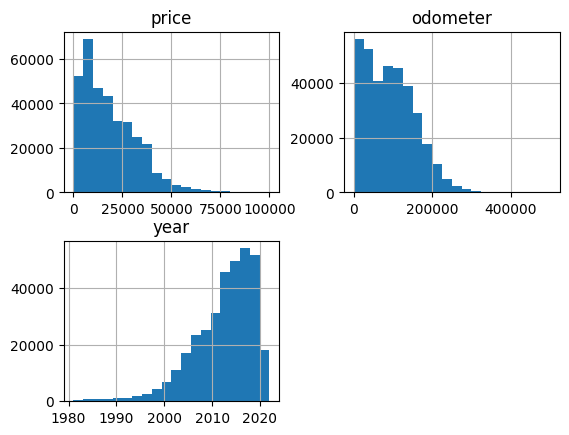

In [33]:
cars_m1.hist(bins=20, column=['price', 'odometer', 'year'])

## transfer non numeric columns to numeric

### transfer condition , set unknown(other) to 0

In [34]:
cars_m1.condition.value_counts()

condition
other        136840
good         108830
excellent     77896
like new      17486
fair           5013
new             809
salvage         171
Name: count, dtype: int64

In [35]:
condition_order = ['other', 'salvage','fair','good','excellent', 'like new', 'new']
condition_mapping = dict(zip(condition_order, [0, 0.2, 0.3, 0.4, 0.6, 0.8, 1]))

In [36]:
condition_mapping

{'other': 0,
 'salvage': 0.2,
 'fair': 0.3,
 'good': 0.4,
 'excellent': 0.6,
 'like new': 0.8,
 'new': 1}

In [37]:
cars_m1['condition'] = cars_m1['condition'].map(condition_mapping)

In [38]:
cars_m1.sample(20)

,id,price,year,manufacturer,condition,fuel,odometer,state
286399,7308012023,17995,2016,volvo,0.8,gas,62257.0,tn
79740,7308831063,41990,2018,toyota,0.4,other,34035.0,fl
54658,7301613411,33590,2020,acura,0.4,gas,10478.0,ca
52601,7313737715,21590,2017,buick,0.4,gas,14934.0,ca
256752,7303139045,13950,2004,chevrolet,0.0,gas,133000.0,or
173440,7302418934,45995,2018,jeep,0.8,gas,26000.0,mn
222705,7313487847,36990,2016,gmc,0.4,gas,23190.0,ny
156039,7303005031,25990,2019,gmc,0.4,gas,70640.0,ma
108285,7304779784,71999,2020,chevrolet,0.0,diesel,21502.0,id
180086,7309143620,5995,2011,chevrolet,0.0,gas,180000.0,mo


In [39]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347045 entries, 0 to 347096
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347045 non-null  int64  
 1   price         347045 non-null  int64  
 2   year          347045 non-null  int64  
 3   manufacturer  347045 non-null  object 
 4   condition     347045 non-null  float64
 5   fuel          347045 non-null  object 
 6   odometer      347045 non-null  float64
 7   state         347045 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 23.8+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>]], dtype=object)

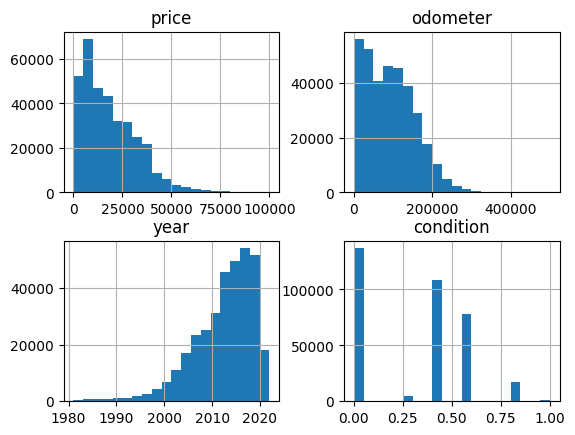

In [40]:
cars_m1.hist(bins=20, column=['price', 'odometer', 'year', 'condition'])

### transfer fuel , set unknow(other) to 0

In [41]:
cars_m1.fuel.value_counts()

fuel
gas         291327
other        28038
diesel       21625
hybrid        4567
electric      1488
Name: count, dtype: int64

In [42]:
fuel_order = ['other','electric', 'hybrid', 'diesel', 'gas']
fuel_mapping = dict(zip(fuel_order, [0, 0.2, 0.4, 0.8, 1]))

In [43]:
fuel_mapping

{'other': 0, 'electric': 0.2, 'hybrid': 0.4, 'diesel': 0.8, 'gas': 1}

In [44]:
cars_m1['fuel'] = cars_m1['fuel'].map(fuel_mapping)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'fuel'}>, <Axes: >]], dtype=object)

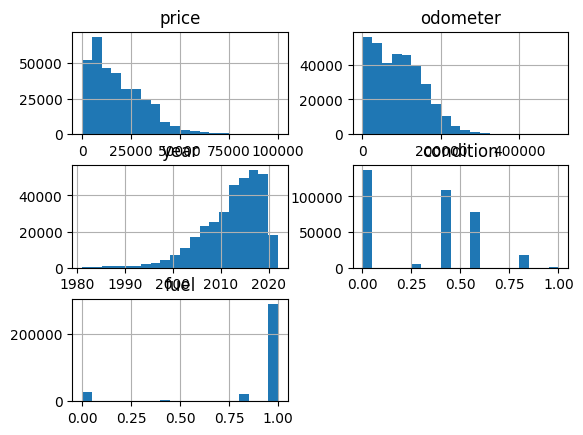

In [45]:
cars_m1.hist(bins=20, column=['price', 'odometer', 'year', 'condition', 'fuel'])

In [46]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347045 entries, 0 to 347096
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            347045 non-null  int64  
 1   price         347045 non-null  int64  
 2   year          347045 non-null  int64  
 3   manufacturer  347045 non-null  object 
 4   condition     347045 non-null  float64
 5   fuel          347045 non-null  float64
 6   odometer      347045 non-null  float64
 7   state         347045 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 23.8+ MB


In [47]:
cars_m1.sample(20)

,id,price,year,manufacturer,condition,fuel,odometer,state
265689,7311734039,21990,2008,toyota,0.0,1.0,135154.0,or
246494,7302069259,43590,2020,acura,0.4,1.0,12012.0,oh
175518,7316392532,7000,2005,ford,0.8,1.0,168659.0,mn
319230,7311507088,2000,2006,kia,0.4,1.0,206387.0,va
275858,7315216570,6000,2008,jeep,0.4,1.0,155000.0,pa
230033,7313775617,28590,2018,dodge,0.4,0.0,40762.0,ny
90984,7314457545,26999,2017,gmc,0.0,1.0,89592.0,fl
340902,7316310898,34590,2016,chevrolet,0.4,1.0,29499.0,wi
192729,7311664856,6500,2010,subaru,0.6,1.0,188000.0,nc
237195,7313751226,38590,2019,acura,0.4,0.0,14906.0,oh


In [48]:
cars_m1 = cars_m1.set_index('id')

In [49]:
cars_m1.sample(20)

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7311285031,6998,2007,subaru,0.0,1.0,137723.0,ma
7309452278,18995,2012,chevrolet,0.0,0.0,145892.0,co
7315039772,18931,2014,chevrolet,0.0,0.4,50046.0,sc
7311967144,32990,2017,ram,0.4,0.0,10193.0,tx
7304134707,9450,2009,ford,0.6,1.0,121011.0,mi
7315849876,1300,2005,ford,0.0,1.0,1.0,il
7316239712,16279,2017,toyota,0.0,1.0,68323.0,tx
7304698550,8980,2007,subaru,0.0,1.0,171738.0,id
7306182363,6495,2009,ford,0.6,1.0,186831.0,ia


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'fuel'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

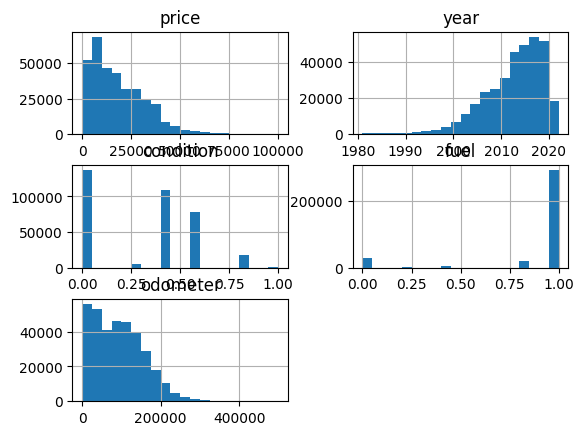

In [50]:
cars_m1.hist(bins=20)

In [51]:
cars_m1['odometer'] = cars_m1['odometer'].astype('int')

In [52]:
cars_m1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347045 entries, 7316814884 to 7301591129
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         347045 non-null  int64  
 1   year          347045 non-null  int64  
 2   manufacturer  347045 non-null  object 
 3   condition     347045 non-null  float64
 4   fuel          347045 non-null  float64
 5   odometer      347045 non-null  int64  
 6   state         347045 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 21.2+ MB


In [53]:
cars_m1.head(20)

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316814884,33590,2014,gmc,0.4,1.0,57923,al
7316814758,22590,2010,chevrolet,0.4,1.0,71229,al
7316814989,39590,2020,chevrolet,0.4,1.0,19160,al
7316743432,30990,2017,toyota,0.4,1.0,41124,al
7316356412,15000,2013,ford,0.6,1.0,128000,al
7316343444,27990,2012,gmc,0.4,1.0,68696,al
7316304717,34590,2016,chevrolet,0.4,1.0,29499,al
7316285779,35000,2019,toyota,0.6,1.0,43000,al
7316257769,29990,2016,chevrolet,0.4,1.0,17302,al


## Convert object manufacturer to numeric value and nomolize to 0 to 1

In [54]:
median_per_category = cars_m1.groupby('manufacturer')['price'].median()

In [55]:
normalized_median = (median_per_category - median_per_category.min()) / (median_per_category.max() - median_per_category.min())

In [56]:
cars_m1['manufacturer'] = cars_m1['manufacturer'].map(normalized_median)

In [57]:
cars_m1.head()

,price,year,manufacturer,condition,fuel,odometer,state
id,,,,,,,
7316814884,33590,2014,0.275743,0.4,1.0,57923,al
7316814758,22590,2010,0.178359,0.4,1.0,71229,al
7316814989,39590,2020,0.178359,0.4,1.0,19160,al
7316743432,30990,2017,0.149762,0.4,1.0,41124,al
7316356412,15000,2013,0.195006,0.6,1.0,128000,al


### State

In [58]:
# cars_m1 = pd.get_dummies(cars_m1['state'], prefix='state')
cars_m1 = pd.get_dummies(cars_m1, columns=['state'], prefix='state')


In [59]:
cars_m1.head()

,price,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7316814884,33590,2014,0.275743,0.4,1.0,57923,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814758,22590,2010,0.178359,0.4,1.0,71229,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814989,39590,2020,0.178359,0.4,1.0,19160,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316743432,30990,2017,0.149762,0.4,1.0,41124,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7316356412,15000,2013,0.195006,0.6,1.0,128000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# numeric_data = cars_m1.select_dtypes(include=['number'])
# sns.pairplot(numeric_data, hue="price")

# Model

## splitting data

In [61]:
X = cars_m1.drop('price', axis=1)
y = cars_m1.price

In [62]:
X.head()

,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,state_ca,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7316814884,2014,0.275743,0.4,1.0,57923,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814758,2010,0.178359,0.4,1.0,71229,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316814989,2020,0.178359,0.4,1.0,19160,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316743432,2017,0.149762,0.4,1.0,41124,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316356412,2013,0.195006,0.6,1.0,128000,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
y.head()

id
7316814884    33590
7316814758    22590
7316814989    39590
7316743432    30990
7316356412    15000
Name: price, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3)

In [65]:
X_train.head()

,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,state_ca,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7308901436,2008,0.178359,0.6,1.0,18000,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7315129345,2016,0.113579,0.0,1.0,89681,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7309868388,2010,0.124851,0.0,1.0,172658,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7314829586,2020,0.107015,0.4,1.0,2195,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7302049645,2018,0.228181,0.4,0.0,19139,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
X_test.head()

,year,manufacturer,condition,fuel,odometer,state_ak,state_al,state_ar,state_az,state_ca,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7314614389,2005,0.216290,0.0,1.0,12000,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7313489096,2019,0.113555,0.4,1.0,44225,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7309847201,2004,0.090309,0.4,1.0,123086,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316728944,2009,0.111712,0.0,1.0,161210,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7315569029,2016,0.078419,0.6,1.0,121626,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [67]:
y_train.head()

id
7308901436    37200
7315129345    10846
7309868388     9499
7314829586    31590
7302049645    36590
Name: price, dtype: int64

In [68]:
y_test.head()

id
7314614389    12345
7313489096    13990
7309847201     3900
7316728944     4200
7315569029     8900
Name: price, dtype: int64

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242931 entries, 7308901436 to 7307208108
Data columns (total 56 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          242931 non-null  int64  
 1   manufacturer  242931 non-null  float64
 2   condition     242931 non-null  float64
 3   fuel          242931 non-null  float64
 4   odometer      242931 non-null  int64  
 5   state_ak      242931 non-null  bool   
 6   state_al      242931 non-null  bool   
 7   state_ar      242931 non-null  bool   
 8   state_az      242931 non-null  bool   
 9   state_ca      242931 non-null  bool   
 10  state_co      242931 non-null  bool   
 11  state_ct      242931 non-null  bool   
 12  state_dc      242931 non-null  bool   
 13  state_de      242931 non-null  bool   
 14  state_fl      242931 non-null  bool   
 15  state_ga      242931 non-null  bool   
 16  state_hi      242931 non-null  bool   
 17  state_ia      242931 non-null  bool   
 

In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104114 entries, 7314614389 to 7306441618
Data columns (total 56 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          104114 non-null  int64  
 1   manufacturer  104114 non-null  float64
 2   condition     104114 non-null  float64
 3   fuel          104114 non-null  float64
 4   odometer      104114 non-null  int64  
 5   state_ak      104114 non-null  bool   
 6   state_al      104114 non-null  bool   
 7   state_ar      104114 non-null  bool   
 8   state_az      104114 non-null  bool   
 9   state_ca      104114 non-null  bool   
 10  state_co      104114 non-null  bool   
 11  state_ct      104114 non-null  bool   
 12  state_dc      104114 non-null  bool   
 13  state_de      104114 non-null  bool   
 14  state_fl      104114 non-null  bool   
 15  state_ga      104114 non-null  bool   
 16  state_hi      104114 non-null  bool   
 17  state_ia      104114 non-null  bool   
 

## Linear regression

In [71]:
lin_model_1 = LinearRegression(fit_intercept=True)

In [72]:
lin_model_1.fit(X_train, y_train)

LinearRegression()

In [73]:
y_train_pred = lin_model_1.predict(X_train)

In [74]:
y_test_pred = lin_model_1.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'MSE: {mse}, R²: {r2}')

MSE: 107100513.12938198, R²: 0.48042986710395497


In [76]:
pd.DataFrame({'Predictions': y_train_pred, 'Actual': y_train.values})

,Predictions,Actual
0,20772.130709,37200
1,19169.662310,10846
2,7251.147730,9499
3,27375.736007,31590
4,32508.752144,36590
...,...,...
242926,19344.849557,8995
242927,16360.125216,8500
242928,28506.052431,62999
242929,18313.934341,14999


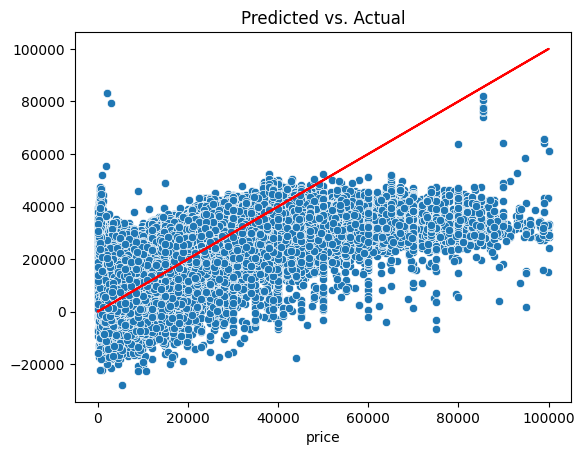

In [77]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r');
ax.set_title('Predicted vs. Actual');